# Mistral Model

In [2]:
import os
import pandas as pd
import pickle
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600

### Sample examples with explanations, predictions and scores

In [3]:
data_save_dir = "/cluster/home/kamara/syntax-shap/data"
batch_size = 64

dataset = "generics"
model_name = "mistral"
threshold_ = 0.5
seed_ = 0


filter_ids_path = os.path.join(data_save_dir, f"{dataset}")
with open(os.path.join(filter_ids_path, f"{dataset}_{model_name}_stats.pkl"), "rb") as f:
    stats = pickle.load(f)

print("Size of the dataset:", stats["n_data"])
print("Size of filtered dataset:", stats["n_filtered"])
print("Maximum number of batches:", stats["n_filtered"]//batch_size)

FileNotFoundError: [Errno 2] No such file or directory: '/cluster/home/kamara/syntax-shap/data/generics/generics_mistral_stats.pkl'

In [6]:

folder_path = f"/cluster/work/zhang/kamara/syntax-shap/results_ids/explanations/{model_name}/{dataset}"  # Replace with your folder path

# Initialize a list to store the dataframes
df_list = []

# Loop through each file in the folder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        full_path = os.path.join(root, file)
        parts = file.split('_')
        if (file.endswith('.pkl')):
            # Extract dataset, model name, and algorithm from the filename
            dataset = parts[-4]
            model_name = parts[-3]
            algorithm = parts[-2]
            seed = parts[-1].split('.pkl')[0]  # Removes the file extension
           
            # Construct the full file path
            file_path = os.path.join(folder_path, file)

            # Read the pickle file
            with open(full_path, 'rb') as file:
                data = pickle.load(file)

            # Assuming the content is a dictionary, create a DataFrame
            df = pd.DataFrame(data)
            # Add the extracted details as new columns
            df['algorithm'] = algorithm
            df['n_token'] = df['input'].str.split().apply(len)
            df['explanation'] = df['explanation'].apply(lambda x: x.reshape(-1))

            # Append to the list of dataframes
            df_list.append(df)

# Concatenate all dataframes in the list
df_explanation = pd.concat(df_list, ignore_index=True)
df_explanation


input_id                      input  \
0          291            A dog sees with   
1          421    Maria is a bride with a   
2          448        A wolf sees without   
3           63         Rome is located in   
4          362  Anna is a uncle without a   
...        ...                        ...   
1655       530            A person has no   
1656       491               A guitar has   
1657       333   Mark is a brother with a   
1658       151   Pittsburgh is located in   
1659        89      Chicago is located in   

                                            explanation  algorithm  n_token  
0                  [-29173.0, 28501.0, 3571.0, -3251.0]  partition        4  
1     [32656.0, -10314.0, -2781.0, 18059.0, 18148.0,...  partition        6  
2                 [-21649.0, 20525.0, -25224.0, 6448.0]  partition        4  
3              [-29036.0, -28348.0, -23678.0, -34334.0]  partition        4  
4     [12906.0, -20102.0, 5429.0, -13425.0, 22666.0,...  partition        6  
...                                                 ...        ...      ...  
1655  [0.30736842105263157, -0.0074432526814667, 0.0...     syntax        4  
1656  [0.16536725482150186, 0.606893721789085, 0.227...     syntax        3  
1657  [0.4922955121908309, -0.04679871567434428, -0....     syntax        6  
1658  [0.8454179254783484, 0.007804632426988921, 0.0...     syntax        4  
1659  [0.5021834061135372, 0.12970156095442595, -0.0...     syntax        4  

[1660 rows x 5 columns]

In [16]:
#### Select rows which input_ids are in the list of input_ids of the rows with algorithm = 'shap'

# Extract input_id values where algorithm is 'shap'
shap_input_ids = df_explanation[df_explanation['algorithm'] == 'shap']['input_id'].unique()

# Filter the DataFrame to keep rows where input_id is in shap_input_ids
filtered_df_explanation = df_explanation[df_explanation['input_id'].isin(shap_input_ids)]
filtered_df_explanation

input_id                                              input  \
64        1360             People can enjoy music by listening to   
65        2398       Some names are given a long time after their   
66        1566                 Japanese tea have a lot of kind of   
67         558             Many different languages are spoken in   
68        2690    Light can also cause the double bonds to form a   
...        ...                                                ...   
3363       105                          Some animals also can use   
3364      1570          Many people believe there is some form of   
3365      1422  Schools provide special education services to ...   
3366      1273                 Many people like to make their own   
3367      1052  Similar interactions cause the northern lights on   

                                            explanation  algorithm  n_token  
64    [21977.0, -5525.0, 10584.0, 6292.0, 7980.0, 96...  partition        7  
65    [30580.0, 17552.0, 28241.0, 19139.0, 32634.0, ...  partition        9  
66    [23313.0, -63219.0, 74428.0, -7306.0, 3508.0, ...  partition        8  
67    [-34986.0, 8200.0, 9417.0, -25627.0, -2951.0, ...  partition        6  
68    [5041.0, -21349.0, -4202.0, -44406.0, -35668.0...  partition       10  
...                                                 ...        ...      ...  
3363  [0.10385966698105555, 0.03616797591346406, 0.0...     syntax        5  
3364  [0.13284234503094844, 0.13687180542872254, 0.1...     syntax        8  
3365  [0.04788985660917734, 0.15194453477917483, 0.2...     syntax        7  
3366  [-0.007451466236859198, -0.0031032740744304653...     syntax        7  
3367  [0.35558585291522976, 0.05868420349132515, -0....     syntax        7  

[160 rows x 5 columns]

In [7]:

folder_path = f"/cluster/work/zhang/kamara/syntax-shap/results_ids/scores/{model_name}/{dataset}"  # Replace with your folder path

# Initialize a list to store the dataframes
df_list = []

# Loop through each file in the folder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        full_path = os.path.join(root, file)
        parts = file.split('_')
        if (file.endswith('.pkl')):
            # Extract dataset, model name, and algorithm from the filename
            dataset = parts[-5]
            model_name = parts[-4]
            algorithm = parts[-3]
            seed = parts[-2]
            threshold = parts[-1].split('.pkl')[0]  # Removes the file extension

            if eval(threshold) == threshold_:
                # Construct the full file path
                file_path = os.path.join(folder_path, file)

                # Read the pickle file
                with open(full_path, 'rb') as file:
                    data = pickle.load(file)

                # Assuming the content is a dictionary, create a DataFrame
                df = pd.DataFrame(data)
                # Add the extracted details as new columns
                df['algorithm'] = algorithm
                df['n_token'] = df['input'].str.split().apply(len)

                # Append to the list of dataframes
                df_list.append(df)

df_final_single_threshold = pd.concat(df_list, ignore_index=True)
df_final_single_threshold


fid_keep_rd  fid_keep   fid_rmv  log_odds_keep  acc_at_k  \
0        0.008225  0.008225  0.008225      -9.015039       0.2   
1        0.167778  0.167778  0.000000     -12.030405       0.0   
2        0.006083  0.006083  0.000000      -8.713431       0.1   
3        0.299905  0.303330  0.000000      -2.626641       0.1   
4        0.419514  0.395366  0.419514      -2.854843       0.3   
...           ...       ...       ...            ...       ...   
1655     0.010545  0.010545  0.000000      -9.263455       0.0   
1656     0.255470  0.255470  0.000000     -12.450865       0.2   
1657     0.008311  0.008311  0.008311      -9.025442       0.0   
1658     0.002538  0.002538  0.000000      -7.839481       0.1   
1659     0.536467  0.512186  0.000000      -3.005149       0.1   

      prob_diff_at_k  input_id                         input  algorithm  \
0           0.437691       383         Anna is a wife with a  partition   
1           0.707780        21            A grandmother is a  partition   
2           0.746086       476           A car moves without  partition   
3           0.746086       478           A car moves without  partition   
4           0.729710       346  George is a sister without a  partition   
...              ...       ...                           ...        ...   
1655        0.664698       530               A person has no     syntax   
1656        0.642074       491                  A guitar has     syntax   
1657        0.647462       333      Mark is a brother with a     syntax   
1658        0.920772       151      Pittsburgh is located in     syntax   
1659        0.902618        89         Chicago is located in     syntax   

      n_token  
0           6  
1           4  
2           4  
3           4  
4           6  
...       ...  
1655        4  
1656        3  
1657        6  
1658        4  
1659        4  

[1660 rows x 10 columns]

In [18]:
sample = pd.merge(filtered_df_explanation, df_final_single_threshold, on=['input', 'input_id', 'algorithm', 'n_token'])
df_str = pd.read_csv(f"/cluster/home/kamara/syntax-shap/data/{dataset}/{dataset}_{model_name}_{seed}_predictions.csv")
sample_with_y = pd.merge(sample, df_str, on=['input', 'input_id'])

In [19]:
sample_with_y

input_id                                              input  \
0        1360             People can enjoy music by listening to   
1        1360             People can enjoy music by listening to   
2        1360             People can enjoy music by listening to   
3        1360             People can enjoy music by listening to   
4        1360             People can enjoy music by listening to   
..        ...                                                ...   
155      1052  Similar interactions cause the northern lights on   
156      1052  Similar interactions cause the northern lights on   
157      1052  Similar interactions cause the northern lights on   
158      1052  Similar interactions cause the northern lights on   
159      1052  Similar interactions cause the northern lights on   

                                           explanation  algorithm  n_token  \
0    [21977.0, -5525.0, 10584.0, 6292.0, 7980.0, 96...  partition        7   
1    [0.026451325085081846, 0.038440944399347914, -...   syntax-w        7   
2    [-2.2429219857837497e-05, 3.3598871329486205e-...       lime        7   
3    [0.15731970881921256, 0.09945758881116337, 0.1...       shap        7   
4    [0.019282695246186393, 0.02802298234375686, -0...     syntax        7   
..                                                 ...        ...      ...   
155  [-4324.0, 38016.0, 8022.0, -8130.0, 7536.0, 74...  partition        7   
156  [0.3553768468299981, 0.08797456517673462, -0.0...   syntax-w        7   
157  [-5.538417228962153e-06, -8.776801821213842e-0...       lime        7   
158  [0.1276510067114094, 0.0842392506822037, 0.156...       shap        7   
159  [0.35558585291522976, 0.05868420349132515, -0....     syntax        7   

     fid_keep_rd  fid_keep   fid_rmv  log_odds_keep  acc_at_k  prob_diff_at_k  \
0       0.473075  0.452468  0.199605      -2.920609       0.2        0.833490   
1       0.478245  0.474786  0.179589      -4.928862       0.2        0.846128   
2       0.478245  0.472733  0.068537      -4.463008       0.2        0.837231   
3       0.096405  0.094727  0.072634      -4.050079       0.0        0.877346   
4       0.477602  0.474113  0.179155      -4.918742       0.2        0.845888   
..           ...       ...       ...            ...       ...             ...   
155     0.747146  0.747146  0.671281     -13.524017       0.2        0.949683   
156     0.747146  0.747146  0.117352     -13.524017       0.2        0.922877   
157     0.747146  0.747146  0.592653     -13.524017       0.1        0.928371   
158     0.747146  0.747146  0.743603     -13.524017       0.2        0.923133   
159     0.747495  0.747495  0.117214     -13.524485       0.2        0.922932   

            y  
0    recorded  
1    recorded  
2    recorded  
3    recorded  
4    recorded  
..        ...  
155     Earth  
156     Earth  
157     Earth  
158     Earth  
159     Earth  

[160 rows x 12 columns]

In [20]:
sample_with_y.to_csv(f"/cluster/home/kamara/syntax-shap/results/samples_{model_name}_{dataset}_{threshold_}.csv", index=False)

### N_tokens vs performance

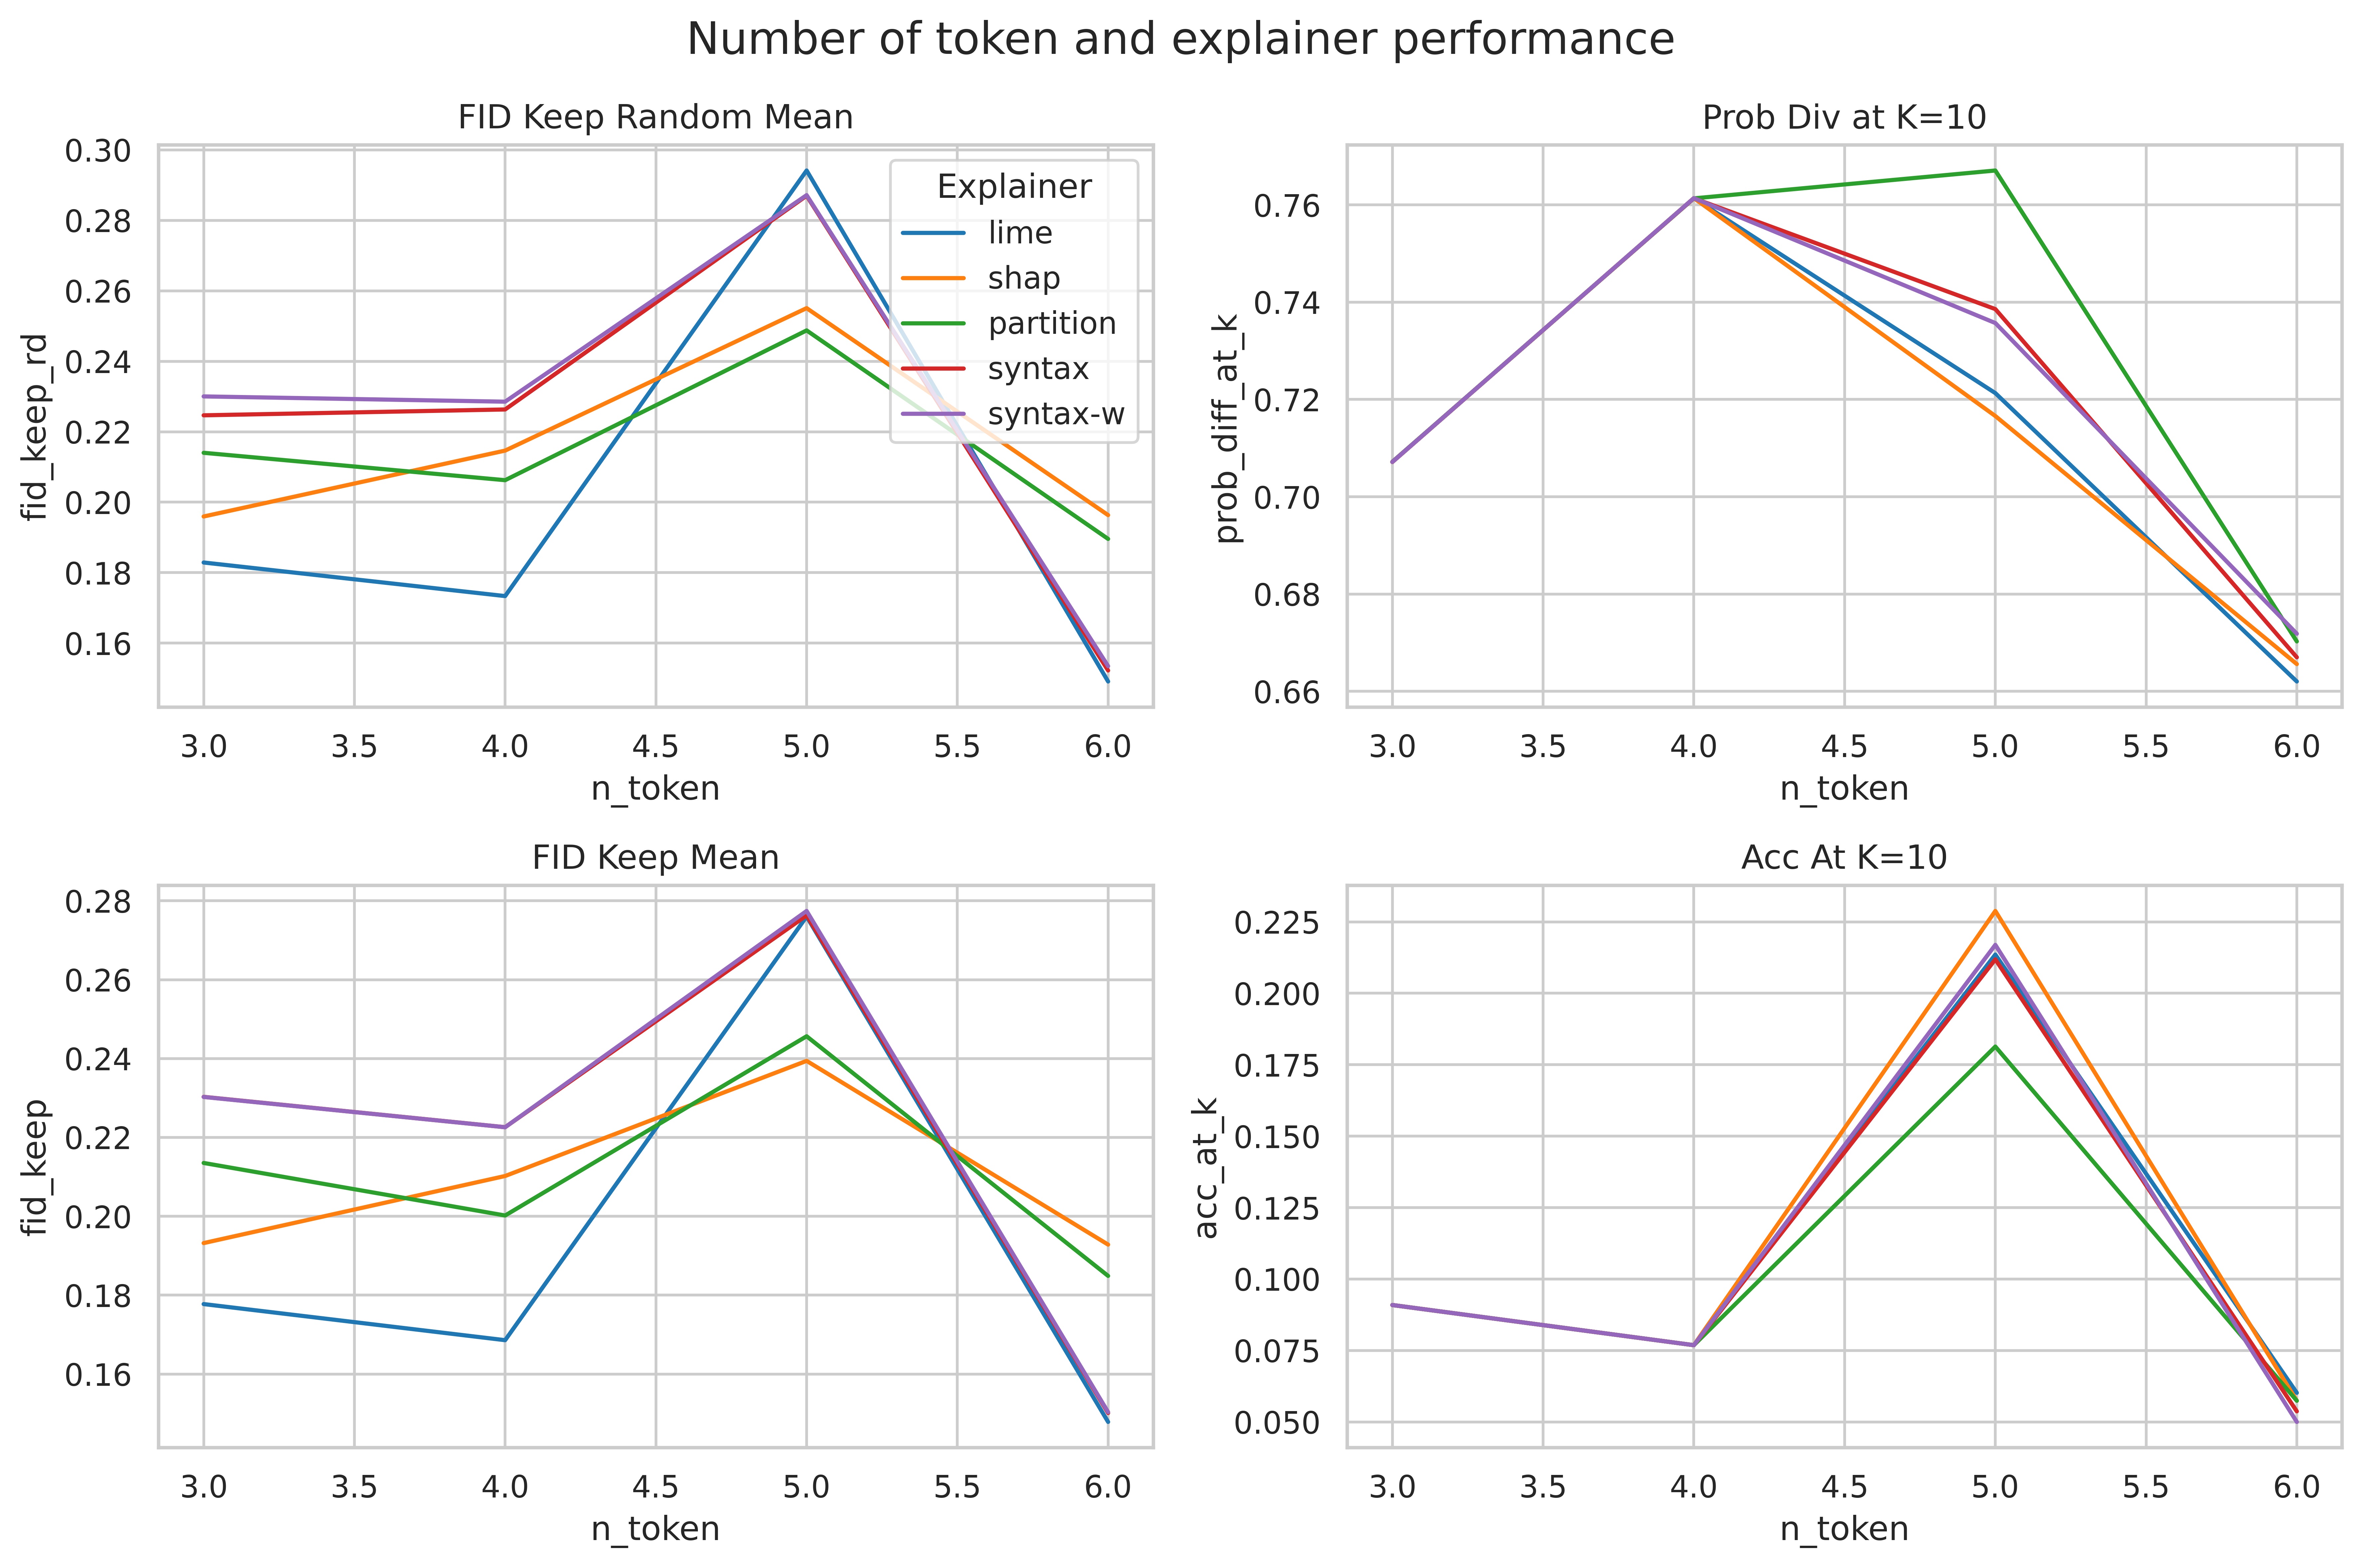

In [8]:
df = df_final_single_threshold.groupby(['algorithm', 'n_token']).mean().reset_index()

# Define the order of algorithms and a colormap
algo_order = ["lime", "shap", "partition", "syntax", "syntax-w"]
palette = sns.color_palette("tab10", len(algo_order))

# Ensure 'algorithm' column is categorical and ordered
df['algorithm'] = pd.Categorical(df['algorithm'], categories=algo_order, ordered=True)

# Plotting with Seaborn
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Creating a lineplot for each score
sns.lineplot(x='n_token', y='fid_keep_rd', hue='algorithm', data=df, ax=axes[0, 0], palette=palette)
axes[0, 0].set_title('FID Keep Random Mean')

sns.lineplot(x='n_token', y='fid_keep', hue='algorithm', data=df, ax=axes[1, 0], palette=palette)
axes[1, 0].set_title('FID Keep Mean')

sns.lineplot(x='n_token', y='prob_diff_at_k', hue='algorithm', data=df, ax=axes[0, 1], palette=palette)
axes[0, 1].set_title('Prob Div at K=10')

sns.lineplot(x='n_token', y='acc_at_k', hue='algorithm', data=df, ax=axes[1, 1], palette=palette)
axes[1, 1].set_title('Acc At K=10')

# Remove legends from all but one plot
for ax in axes.flat:
    ax.legend().remove()

# Add the legend back to the first subplot
axes[0, 0].legend(title='Explainer', loc='upper right')

fig.suptitle('Number of token and explainer performance', fontsize=16)

plt.tight_layout()
plt.show()

### Performance at Thresholds

In [15]:

folder_path = f"/cluster/work/zhang/kamara/syntax-shap/results_ids/scores/{model_name}/{dataset}"  # Replace with your folder path

# Initialize a list to store the dataframes
df_list = []

# Loop through each file in the folder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        full_path = os.path.join(root, file)
        parts = file.split('_')
        if (file.endswith('.pkl')):
            # Extract dataset, model name, and algorithm from the filename
            dataset = parts[-5]
            model_name = parts[-4]
            algorithm = parts[-3]
            seed = parts[-2]
            threshold = parts[-1].split('.pkl')[0]  # Removes the file extension

            if eval(seed) == seed_:
                # Construct the full file path
                file_path = os.path.join(folder_path, file)

                # Read the pickle file
                with open(full_path, 'rb') as file:
                    data = pickle.load(file)

                # Assuming the content is a dictionary, create a DataFrame
                df = pd.DataFrame(data)

                # Add the extracted details as new columns
                df['algorithm'] = algorithm
                df['n_token'] = df['input'].str.split().apply(len)
                df['threshold'] = eval(threshold)

                # Append to the list of dataframes
                df_list.append(df)

# Concatenate all dataframes in the list
df_final = pd.concat(df_list, ignore_index=True)
df_final


fid_keep_rd  fid_keep   fid_rmv  log_odds_keep  acc_at_k  \
0         0.489080  0.489080  0.410476     -13.100284       0.0   
1         0.419548  0.419548  0.419548     -12.946936       0.0   
2         0.264764  0.264764  0.258300     -12.486600       0.1   
3         0.951997  0.885386  0.506721      -2.641315       0.1   
4        -0.055752 -0.023268 -0.000185       1.151655       0.4   
...            ...       ...       ...            ...       ...   
42935     0.094749  0.073069  0.112373      -1.050494       0.5   
42936     0.083813  0.745940  0.994489      -1.386586       0.3   
42937     0.001969  0.001969  0.001969      -7.585843       0.7   
42938     0.032521  0.022086  0.038164      -0.864407       0.4   
42939     0.133946  0.126252  0.130171      -2.856910       0.0   

       prob_diff_at_k  input_id  \
0            0.988718      4484   
1            0.981678      4547   
2            0.579609      1012   
3            0.900405      2874   
4            0.368964      4444   
...               ...       ...   
42935        0.346989      3108   
42936        0.620611      1822   
42937        0.091373      4516   
42938        0.237935      1053   
42939        0.859179      4029   

                                                   input  algorithm  n_token  \
0      Home loans are loans that are taken for the pu...  partition       13   
1      Most users write a little bit about themselves...  partition       14   
2             Similar process are used to produce animal  partition        7   
3      Salt water needs a lower temperature to freeze...  partition       10   
4      Some people form bands which write and record ...  partition       13   
...                                                  ...        ...      ...   
42935  Duke crash lands back on Earth and finds most ...     syntax       11   
42936     Women compete in modern Olympics for the first     syntax        8   
42937  Many people find gardens relaxing especially i...     syntax       14   
42938             Many books are published every year in     syntax        7   
42939  Some grocery stores are  small community store...     syntax       12   

       threshold  
0            0.5  
1            0.5  
2            0.5  
3            0.5  
4            0.5  
...          ...  
42935        0.8  
42936        0.8  
42937        0.8  
42938        0.8  
42939        0.8  

[42940 rows x 11 columns]

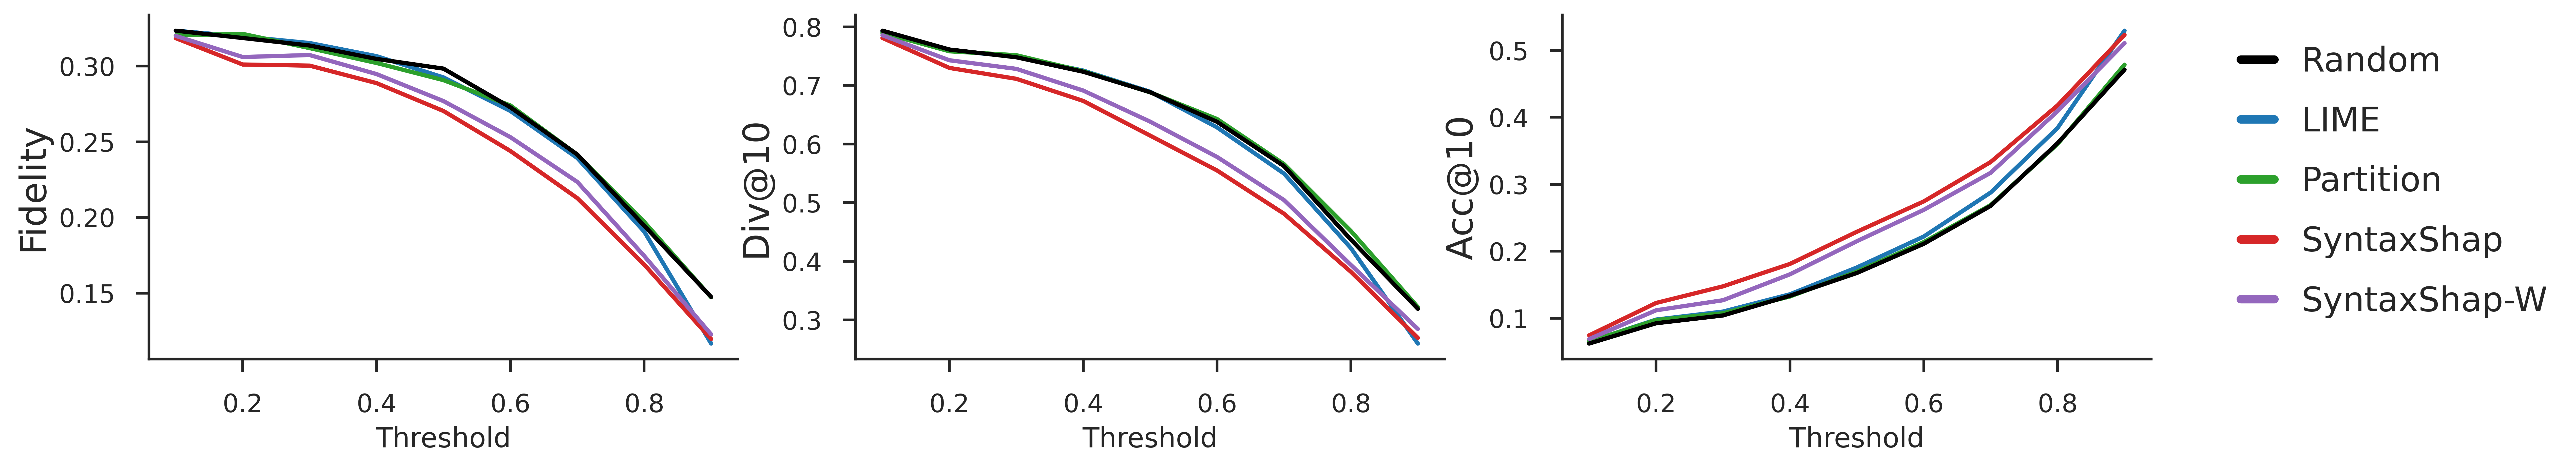

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Grouping and aggregating data
df = df_final.groupby(['algorithm', 'threshold']).mean().reset_index()
df = df[df['algorithm'] != 'shap']

# Define the order of algorithms and a colormap
algo_order = ["random", "lime", "shap", "partition", "syntax", "syntax-w"]
pal = sns.color_palette("tab10", len(algo_order))

# Ensure 'algorithm' column is categorical and ordered
df['algorithm'] = pd.Categorical(df['algorithm'], categories=algo_order, ordered=True)
df['algorithm'] = df['algorithm'].replace({'lime': 'LIME', 'shap': 'NaiveShap', 'partition': 'Partition', 'syntax': 'SyntaxShap', 'syntax-w': 'SyntaxShap-W', 'random': 'Random'})
dict_color = {"Random": 'black', "LIME": pal[0], "NaiveShap": pal[1], "Partition": pal[2], "SyntaxShap": pal[3], "SyntaxShap-W": pal[4]}   

#legend_order = ["Random", "LIME", "NaiveShap", "Partition", "SyntaxShap", "SyntaxShap-W"]
legend_order = ["Random", "LIME", "Partition", "SyntaxShap", "SyntaxShap-W"]

fig, axes = plt.subplots(1, 3, figsize=(17,3))

# Adjusting various parameters
# Plotting with Seaborn
sns.set(style="whitegrid")
sns.set_style("ticks")
sns.set_context("notebook", rc={"xtick.labelsize" : 15, "ytick.labelsize" : 15})


# Creating a lineplot for each score
sns.lineplot(x='threshold', y='fid_keep', hue='algorithm', data=df, ax=axes[0], palette=dict_color, linewidth=2)
axes[0].set_title('')
axes[0].set_xlabel('Threshold', fontsize=13)
axes[0].set_ylabel('Fidelity', fontsize=17)
axes[0].tick_params(axis='both', which='major', labelsize=12, pad=10)  # Increase tick font size and padding

sns.lineplot(x='threshold', y='prob_diff_at_k', hue='algorithm', data=df, ax=axes[1], palette=dict_color, linewidth=2)
axes[1].set_title('')
axes[1].set_xlabel('Threshold', fontsize=13)
axes[1].set_ylabel('Div@10', fontsize=17)
axes[1].tick_params(axis='both', which='major', labelsize=12, pad=10)  # Increase tick font size and padding

sns.lineplot(x='threshold', y='acc_at_k', hue='algorithm', data=df, ax=axes[2], palette=dict_color, linewidth=2)
axes[2].set_title('')
axes[2].set_xlabel('Threshold', fontsize=13)
axes[2].set_ylabel('Acc@10', fontsize=17)
axes[2].tick_params(axis='both', which='major', labelsize=12, pad=10)  # Increase tick font size and padding

# Remove legends from all but one plot
for ax in axes.flat:
    ax.legend().remove()

# Add the legend back to the first subplot with custom settings
handles, labels = axes[2].get_legend_handles_labels()
ordered_handles = [handles[labels.index(label)] for label in legend_order]
ordered_labels = [label for label in legend_order]
legend = axes[2].legend(ordered_handles, ordered_labels, title='', loc='upper left', bbox_to_anchor=(1.1, 1), fontsize=16, frameon=False, handlelength=1, labelspacing=0.8)
legend.get_title().set_fontsize('17')  # Increase legend title font size
for line in legend.get_lines():
    line.set_linewidth(4)  # Increase line width in legend

#fig.suptitle(f'MistralAI 7b, {dataset} dataset', fontsize=16)  # Adjust suptitle position

sns.despine()
#plt.tight_layout()
plt.show()

fig.savefig(f"/cluster/home/kamara/syntax-shap/figures/{model_name}/{dataset}/scores_{model_name}_{dataset}_no_shap.pdf", bbox_inches='tight', dpi=600)


In [18]:
#### Select rows which input_ids are in the list of input_ids of the rows with algorithm = 'shap'

# Extract input_id values where algorithm is 'shap'
shap_input_ids = df_final[df_final['algorithm'] == 'shap']['input_id'].unique()

# Filter the DataFrame to keep rows where input_id is in shap_input_ids
filtered_df_final = df_final[df_final['input_id'].isin(shap_input_ids)]
filtered_df_final

fid_keep_rd  fid_keep   fid_rmv  log_odds_keep  acc_at_k  \
2         0.264764  0.264764  0.258300     -12.486600       0.1   
3         0.951997  0.885386  0.506721      -2.641315       0.1   
7         0.127296  0.127296  0.127296     -11.754282       0.1   
8         0.020704  0.020704  0.020704      -9.938129       0.0   
9         0.279943  0.279943  0.279943     -12.542346       0.1   
...            ...       ...       ...            ...       ...   
42929     0.000286 -0.009875  0.015247       0.499332       0.7   
42932     0.786849  0.761861  0.911164      -1.808735       0.4   
42934     0.176277  0.172926  0.399391      -0.541658       0.5   
42936     0.083813  0.745940  0.994489      -1.386586       0.3   
42938     0.032521  0.022086  0.038164      -0.864407       0.4   

       prob_diff_at_k  input_id  \
2            0.579609      1012   
3            0.900405      2874   
7            0.699490      2065   
8            0.449026       626   
9            0.932246       979   
...               ...       ...   
42929       -0.022627       416   
42932        0.445314       779   
42934        0.237985      1466   
42936        0.620611      1822   
42938        0.237935      1053   

                                                   input  algorithm  n_token  \
2             Similar process are used to produce animal  partition        7   
3      Salt water needs a lower temperature to freeze...  partition       10   
7      American troops defeat British troops at the B...  partition        9   
8                        Some decisions are taken by the  partition        6   
9                 Police think the fire was deliberately  partition        6   
...                                                  ...        ...      ...   
42929                             Some art films do have     syntax        5   
42932                    Some people have yard or garage     syntax        6   
42934                 Mail is delivered once per week by     syntax        7   
42936     Women compete in modern Olympics for the first     syntax        8   
42938             Many books are published every year in     syntax        7   

       threshold  
2            0.5  
3            0.5  
7            0.5  
8            0.5  
9            0.5  
...          ...  
42929        0.8  
42932        0.8  
42934        0.8  
42936        0.8  
42938        0.8  

[28837 rows x 11 columns]

In [19]:
filtered_df_final['input_id'].nunique(), df_final['input_id'].nunique()

(544, 858)

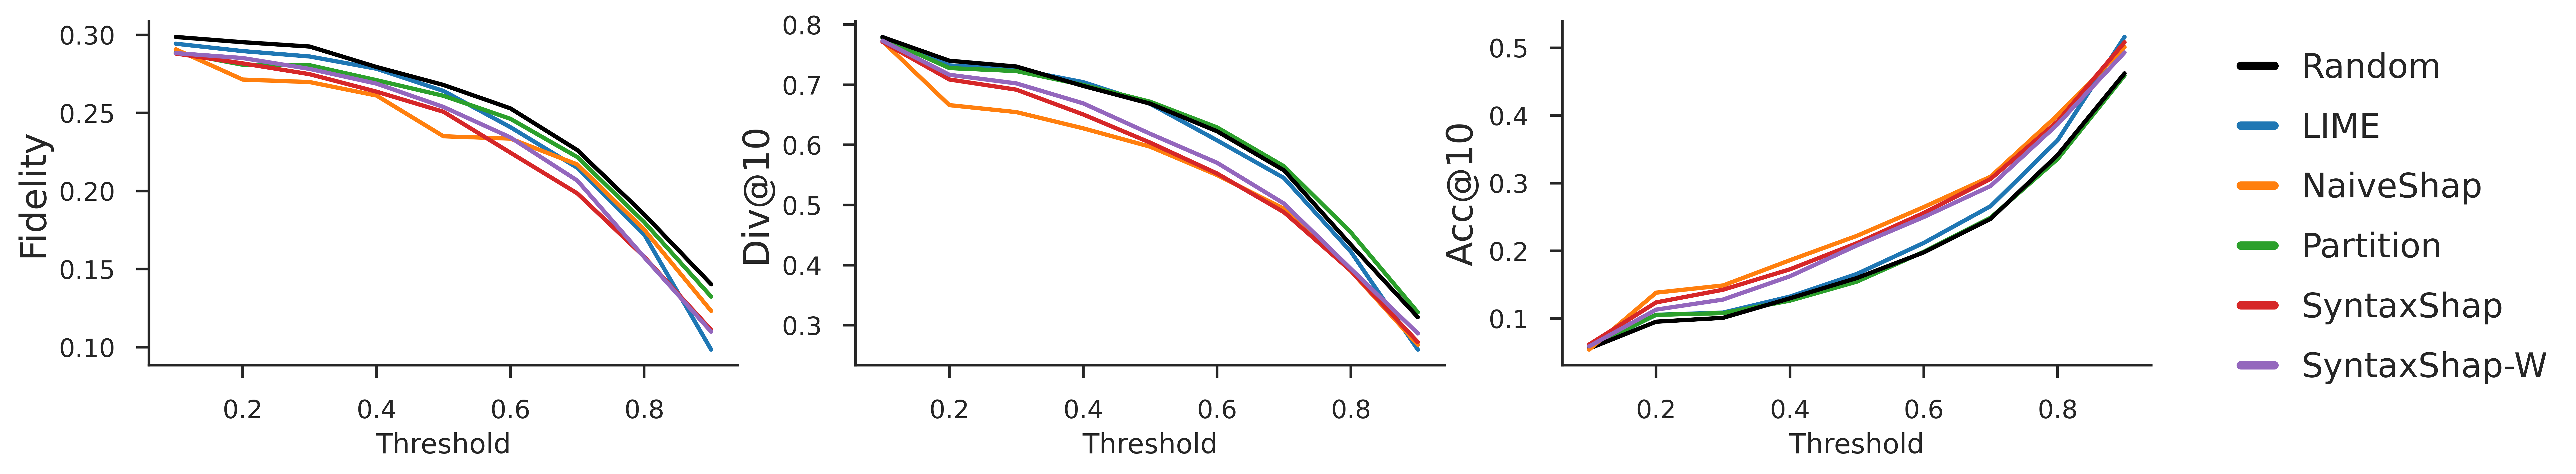

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Grouping and aggregating data
df = filtered_df_final.groupby(['algorithm', 'threshold']).mean().reset_index()

# Define the order of algorithms and a colormap
algo_order = ["random", "lime", "shap", "partition", "syntax", "syntax-w"]
pal = sns.color_palette("tab10", len(algo_order))

# Ensure 'algorithm' column is categorical and ordered
df['algorithm'] = pd.Categorical(df['algorithm'], categories=algo_order, ordered=True)
df['algorithm'] = df['algorithm'].replace({'lime': 'LIME', 'shap': 'NaiveShap', 'partition': 'Partition', 'syntax': 'SyntaxShap', 'syntax-w': 'SyntaxShap-W', 'random': 'Random'})
dict_color = {"Random": 'black', "LIME": pal[0], "NaiveShap": pal[1], "Partition": pal[2], "SyntaxShap": pal[3], "SyntaxShap-W": pal[4]}   

legend_order = ["Random", "LIME", "NaiveShap", "Partition", "SyntaxShap", "SyntaxShap-W"]

fig, axes = plt.subplots(1, 3, figsize=(17,3))

# Adjusting various parameters
# Plotting with Seaborn
sns.set(style="whitegrid")
sns.set_style("ticks")
sns.set_context("notebook", rc={"xtick.labelsize" : 15, "ytick.labelsize" : 15})


# Creating a lineplot for each score
sns.lineplot(x='threshold', y='fid_keep', hue='algorithm', data=df, ax=axes[0], palette=dict_color, linewidth=2)
axes[0].set_title('')
axes[0].set_xlabel('Threshold', fontsize=13)
axes[0].set_ylabel('Fidelity', fontsize=17)
axes[0].tick_params(axis='both', which='major', labelsize=12, pad=10)  # Increase tick font size and padding

sns.lineplot(x='threshold', y='prob_diff_at_k', hue='algorithm', data=df, ax=axes[1], palette=dict_color, linewidth=2)
axes[1].set_title('')
axes[1].set_xlabel('Threshold', fontsize=13)
axes[1].set_ylabel('Div@10', fontsize=17)
axes[1].tick_params(axis='both', which='major', labelsize=12, pad=10)  # Increase tick font size and padding

sns.lineplot(x='threshold', y='acc_at_k', hue='algorithm', data=df, ax=axes[2], palette=dict_color, linewidth=2)
axes[2].set_title('')
axes[2].set_xlabel('Threshold', fontsize=13)
axes[2].set_ylabel('Acc@10', fontsize=17)
axes[2].tick_params(axis='both', which='major', labelsize=12, pad=10)  # Increase tick font size and padding

# Remove legends from all but one plot
for ax in axes.flat:
    ax.legend().remove()

# Add the legend back to the first subplot with custom settings
handles, labels = axes[2].get_legend_handles_labels()
ordered_handles = [handles[labels.index(label)] for label in legend_order]
ordered_labels = [label for label in legend_order]
legend = axes[2].legend(ordered_handles, ordered_labels, title='', loc='upper left', bbox_to_anchor=(1.1, 1), fontsize=16, frameon=False, handlelength=1, labelspacing=0.8)
legend.get_title().set_fontsize('17')  # Increase legend title font size
for line in legend.get_lines():
    line.set_linewidth(4)  # Increase line width in legend

#fig.suptitle(f'MistralAI 7b, {dataset} dataset', fontsize=16)  # Adjust suptitle position

sns.despine()
#plt.tight_layout()
plt.show()

fig.savefig(f"/cluster/home/kamara/syntax-shap/figures/{model_name}/{dataset}/scores_{model_name}_{dataset}_shap_filtered.pdf", bbox_inches='tight', dpi=600)


## N tokens vs performance

In [4]:

folder_path = f"/cluster/work/zhang/kamara/syntax-shap/results_ids/scores/{model_name}"  # Replace with your folder path

# Initialize a list to store the dataframes
df_list = []

# Loop through each file in the folder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        full_path = os.path.join(root, file)
        parts = file.split('_')
        if (file.endswith('.pkl')):
            # Extract dataset, model name, and algorithm from the filename
            dataset = parts[-5]
            model_name = parts[-4]
            algorithm = parts[-3]
            seed = parts[-2]
            threshold = parts[-1].split('.pkl')[0]  # Removes the file extension

            if (eval(seed) == seed_) and (eval(threshold) == threshold_):# and (dataset != 'negation'):
                # Construct the full file path
                file_path = os.path.join(folder_path, file)

                # Read the pickle file
                with open(full_path, 'rb') as file:
                    data = pickle.load(file)

                # Assuming the content is a dictionary, create a DataFrame
                df = pd.DataFrame(data)

                # Add the extracted details as new columns
                df['algorithm'] = algorithm
                df['n_token'] = df['input'].str.split().apply(len)
                df['threshold'] = eval(threshold)
                df['dataset'] = dataset

                # Append to the list of dataframes
                df_list.append(df)

# Concatenate all dataframes in the list
df_final = pd.concat(df_list, ignore_index=True)
df_final


fid_keep_rd  fid_keep   fid_rmv  log_odds_keep  acc_at_k  \
0         0.420129  0.378165  0.375612      -1.961204       0.2   
1         0.010138  0.010138  0.010138      -9.224166       0.2   
2         0.184373  0.177081  0.184373      -3.230112       0.4   
3        -0.054903  0.020616  0.014170      -0.852201       0.1   
4         0.030357 -0.155401 -0.130865       0.687662       0.7   
...            ...       ...       ...            ...       ...   
12683     0.079589  0.100117  0.097487      -2.174122       0.3   
12684     0.002699  0.002699  0.002699      -7.900857       0.2   
12685     0.014051  0.014051  0.014051      -9.550492       0.1   
12686    -0.136541 -0.090358  0.296212       0.266238       0.7   
12687     0.753356  0.753356 -0.026261     -13.532295       0.0   

       prob_diff_at_k  input_id  \
0            0.781496        94   
1            0.785604        98   
2            0.709440        97   
3            0.575964       355   
4            0.296770       305   
...               ...       ...   
12683        0.713393      5435   
12684        0.595659      1747   
12685        0.712017      1696   
12686        0.148507       676   
12687        0.970584      4668   

                                                   input  algorithm  n_token  \
0                               Dallas is not located in  partition        5   
1                              Detroit is not located in  partition        5   
2                                   Denver is located in  partition        4   
3                                Martha is a aunt with a  partition        6   
4                                       A lion sees with  partition        4   
...                                                  ...        ...      ...   
12683  Some chapters have special rules in the game a...     syntax       16   
12684            Content needs to be split up on several     syntax        8   
12685      Most ant species make homes where they always     syntax        8   
12686                     Some people get very sick from     syntax        6   
12687  Tree rings are more visible in places where th...     syntax       14   

       threshold   dataset  
0            0.5  negation  
1            0.5  negation  
2            0.5  negation  
3            0.5  negation  
4            0.5  negation  
...          ...       ...  
12683        0.5  generics  
12684        0.5  generics  
12685        0.5  generics  
12686        0.5  generics  
12687        0.5  generics  

[12688 rows x 12 columns]

0         7
1         9
2        20
3        22
4        24
       ... 
853    5748
854    5752
855    5757
856    5760
857    5774
Name: input_id, Length: 858, dtype: int64


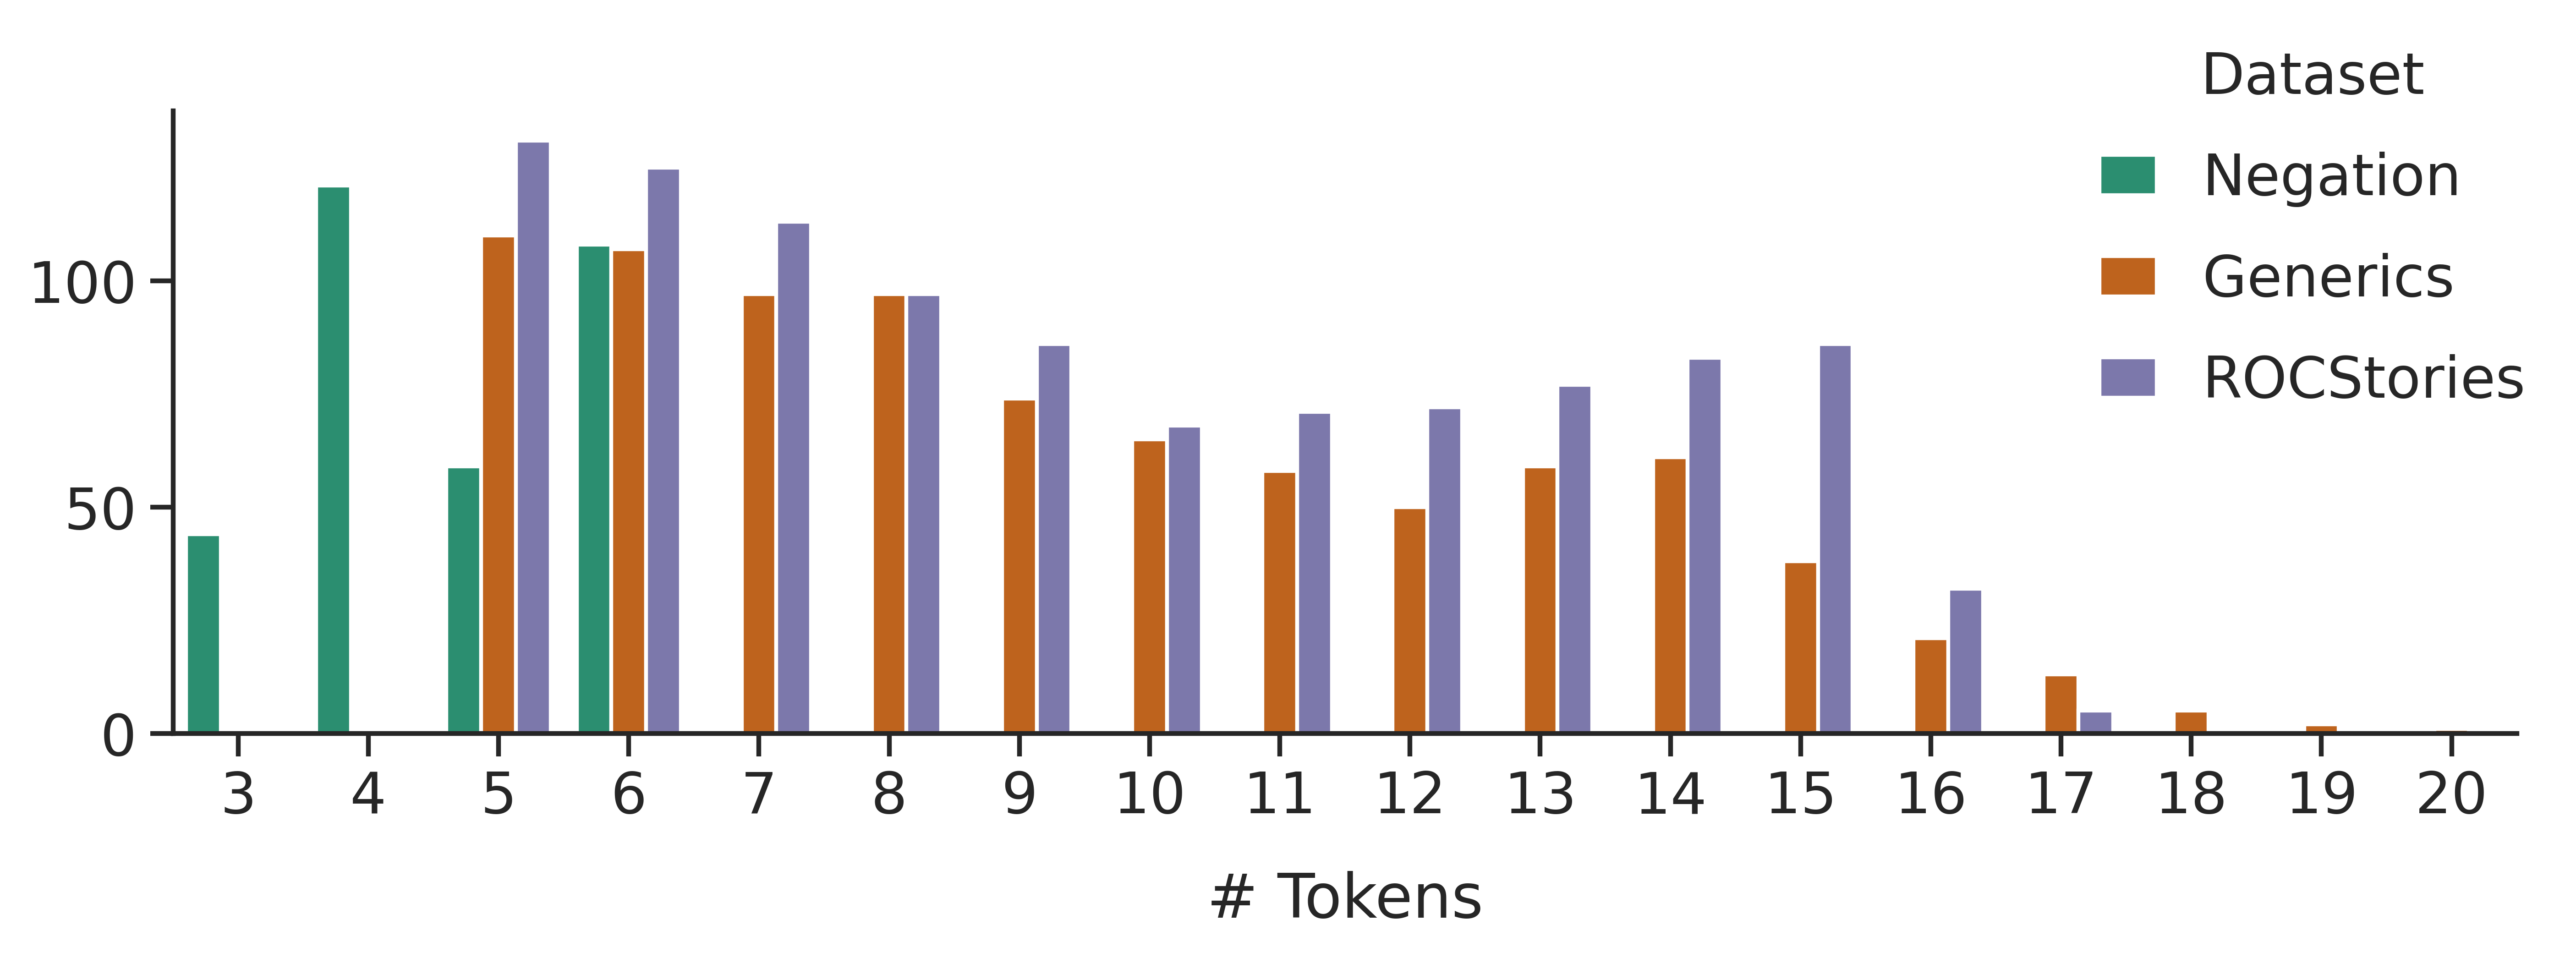

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = df_final[['input_id', 'input', 'n_token', 'dataset']]
df = df.groupby(['dataset', 'input_id']).mean().reset_index()
df['n_token'] = df['n_token'].apply(lambda x: int(x))
print(df[df['dataset'] == 'generics']['input_id'])
order = ['negation', 'generics', 'rocstories']
df = df.sort_values(by='dataset', key=lambda x: x.map({v: i for i, v in enumerate(order)}))
df['dataset'] = df['dataset'].replace({'negation': 'Negation', 'generics': 'Generics', 'rocstories': 'ROCStories'})


# Plotting with Seaborn
sns.set(style="whitegrid")
sns.set_style("ticks")
sns.set_context("notebook", rc={"xtick.labelsize" : 15, "ytick.labelsize" : 15})


# Plotting
plt.figure(figsize=(11, 3))
ax = sns.countplot(data=df, x='n_token', hue='dataset', palette=sns.color_palette("Dark2"), width=0.8, edgecolor='white')
plt.xlabel('# Tokens', fontsize=16, labelpad=12)
plt.ylabel(None)

legend = ax.legend(title='Dataset', loc='upper left', bbox_to_anchor=(.8, 1.18), fontsize=15, frameon=False, handlelength=1, labelspacing=0.8)
legend.get_title().set_fontsize('15')  # Increase legend title font size
for line in legend.get_lines():
    line.set_linewidth(4)  # Increase line width in legend


sns.despine()

plt.savefig(f"/cluster/home/kamara/syntax-shap/figures/{model_name}/scores_{model_name}_n_token_count_2.pdf", bbox_inches='tight', dpi=600)

plt.show()


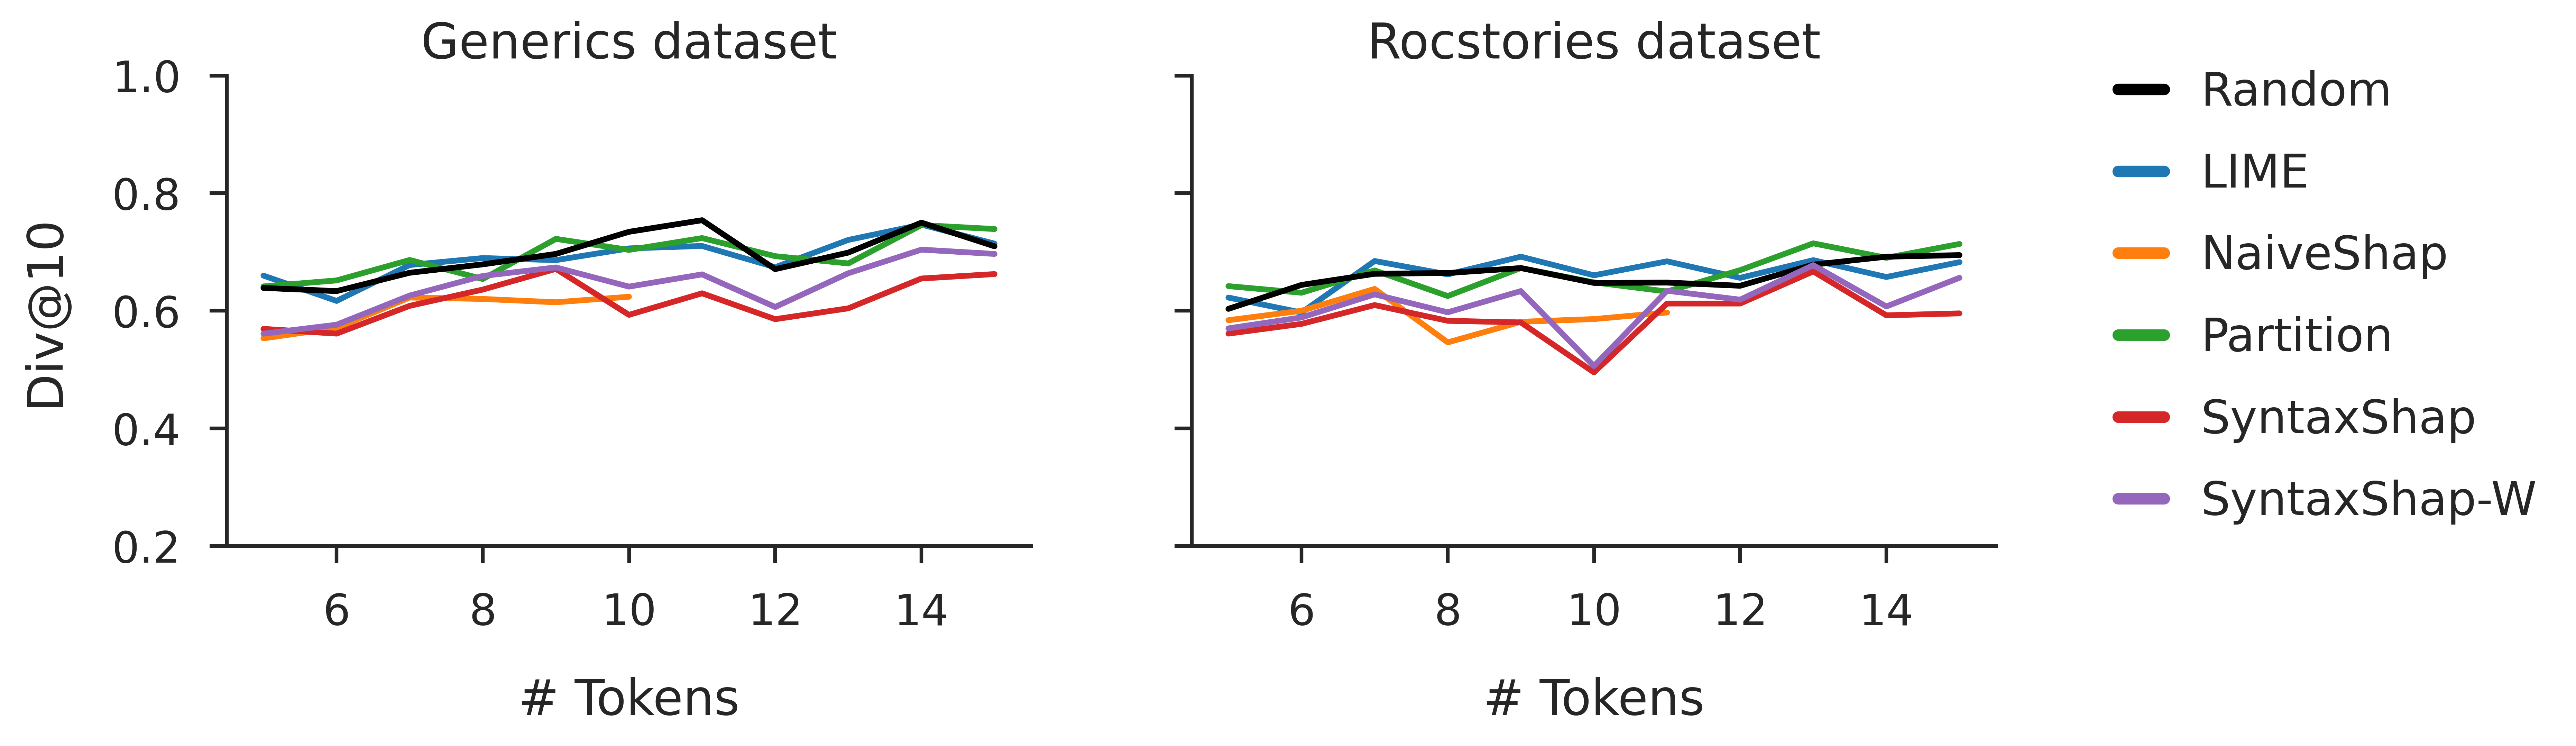

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Grouping and aggregating data
df = df_final.groupby(['algorithm', 'dataset', 'n_token']).mean().reset_index()
df = df[df['dataset'] != 'negation']
df = df[df['n_token'] <= 15]


# Define the order of algorithms and a colormap
algo_order = ["random", "lime", "shap", "partition", "syntax", "syntax-w"]
pal = sns.color_palette("tab10", len(algo_order))

# Ensure 'algorithm' column is categorical and ordered
df['algorithm'] = pd.Categorical(df['algorithm'], categories=algo_order, ordered=True)
df['algorithm'] = df['algorithm'].replace({'lime': 'LIME', 'shap': 'NaiveShap', 'partition': 'Partition', 'syntax': 'SyntaxShap', 'syntax-w': 'SyntaxShap-W', 'random': 'Random'})
dict_color = {"Random": 'black', "LIME": pal[0], "NaiveShap": pal[1], "Partition": pal[2], "SyntaxShap": pal[3], "SyntaxShap-W": pal[4]}   

legend_order = ["Random", "LIME", "NaiveShap", "Partition", "SyntaxShap", "SyntaxShap-W"]

fig, axes = plt.subplots(1, 2, figsize=(11,3), sharey=True)

# Adjusting various parameters
# Plotting with Seaborn
sns.set(style="whitegrid")
sns.set_style("ticks")
sns.set_context("notebook", rc={"xtick.labelsize" : 17, "ytick.labelsize" : 17})


# Creating a lineplot for each score
sns.lineplot(x='n_token', y='prob_diff_at_k', hue='algorithm', data=df[df['dataset']=='generics'], ax=axes[0], palette=dict_color, linewidth=2)#, errorbar='se')#, err_style='bars')
axes[0].set_title('Generics dataset', fontsize=17)
axes[0].set_xlabel('# Tokens', fontsize=17, labelpad=15)
axes[0].set_ylabel('Div@10', fontsize=17, labelpad=15)
axes[0].tick_params(axis='both', which='major', labelsize=15, pad=10)  # Increase tick font size and padding
axes[0].set_ylim(0.2, 1)

sns.lineplot(x='n_token', y='prob_diff_at_k', hue='algorithm', data=df[df['dataset']=='rocstories'], ax=axes[1], palette=dict_color, linewidth=2)#, errorbar='se')#, err_style='bars')
axes[1].set_title('Rocstories dataset', fontsize=17)
axes[1].set_xlabel('# Tokens', fontsize=17, labelpad=15)
axes[1].set_ylabel('Div@10', fontsize=17, labelpad=15)
axes[1].tick_params(axis='both', which='major', labelsize=15, pad=10)  # Increase tick font size and padding

# Remove legends from all but one plot
for ax in axes.flat:
    ax.legend().remove()

# Add the legend back to the first subplot with custom settings
handles, labels = axes[1].get_legend_handles_labels()
ordered_handles = [handles[labels.index(label)] for label in legend_order]
ordered_labels = [label for label in legend_order]
legend = axes[1].legend(ordered_handles, ordered_labels, title='', loc='upper left', bbox_to_anchor=(1.1, 1.1), fontsize=16, frameon=False, handlelength=1, labelspacing=0.8)
legend.get_title().set_fontsize('17')  # Increase legend title font size
for line in legend.get_lines():
    line.set_linewidth(4)  # Increase line width in legend

#fig.suptitle(f'MistralAI 7b, {dataset} dataset', fontsize=16)  # Adjust suptitle position

sns.despine()
#plt.tight_layout()
plt.show()

fig.savefig(f"/cluster/home/kamara/syntax-shap/figures/{model_name}/scores_{model_name}_n_tokens_vs_performance_15tokens_mean.pdf", bbox_inches='tight', dpi=600)
